In [1]:
%matplotlib notebook

from cv2 import cv2
import matplotlib.pyplot as plt
import numpy as np

def show(x, cmap=None):
    dpi = 32
    print(x.shape)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    #plt.figure(figsize=(x.shape[0]/dpi, x.shape[1]/dpi), dpi=dpi)
    plt.figure(figsize=(25, 25), dpi=dpi)
    plt.imshow(x, cmap=cmap)
    #fig.figimage(x, cmap=plt.cm.gray)
    plt.show()

(122, 122, 3)


<IPython.core.display.Javascript object>


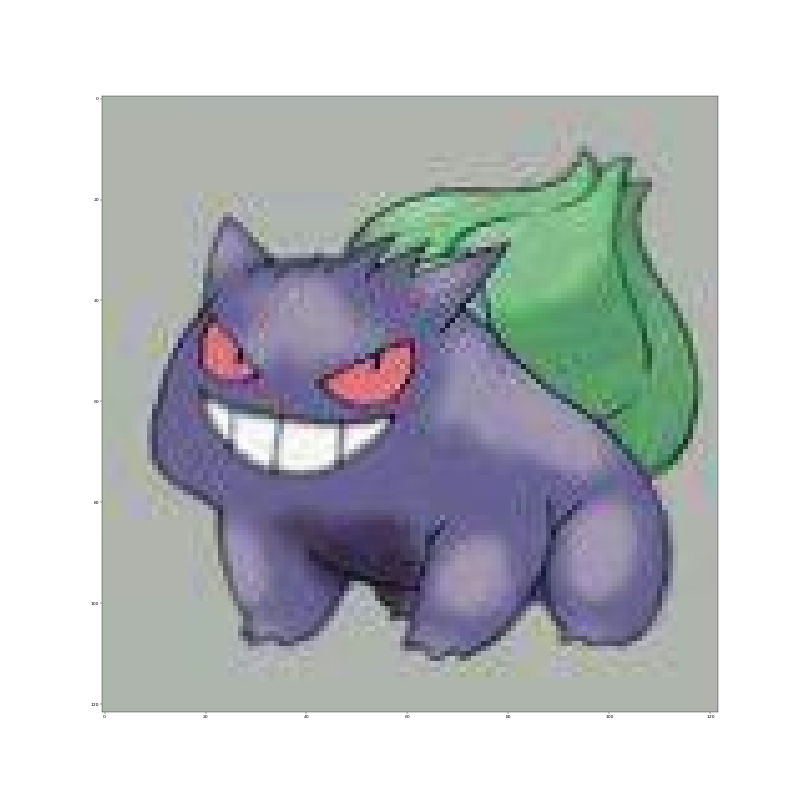

In [2]:
img = cv2.imread("test.png")
show(img)

(122, 122, 3)


<IPython.core.display.Javascript object>


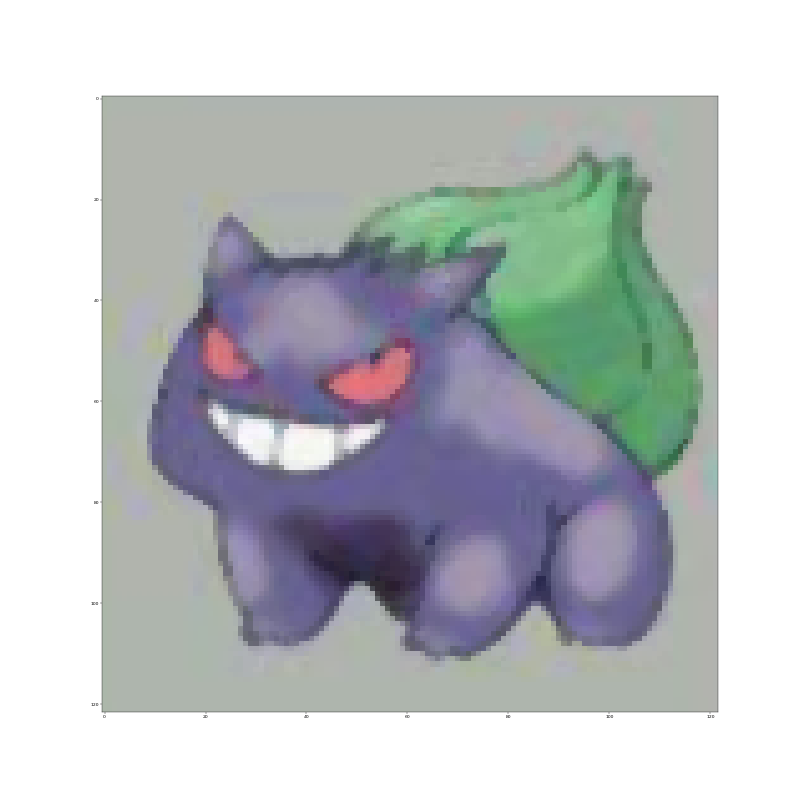

In [6]:
median = cv2.medianBlur(img, 3)
show(median)

(122, 122)


<IPython.core.display.Javascript object>


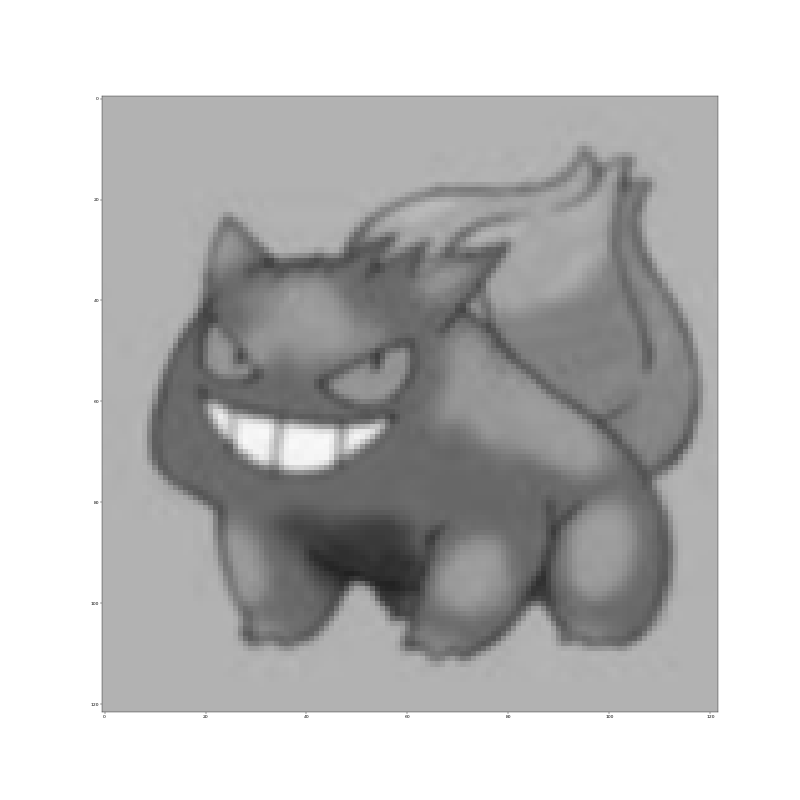

(122, 122)


<IPython.core.display.Javascript object>


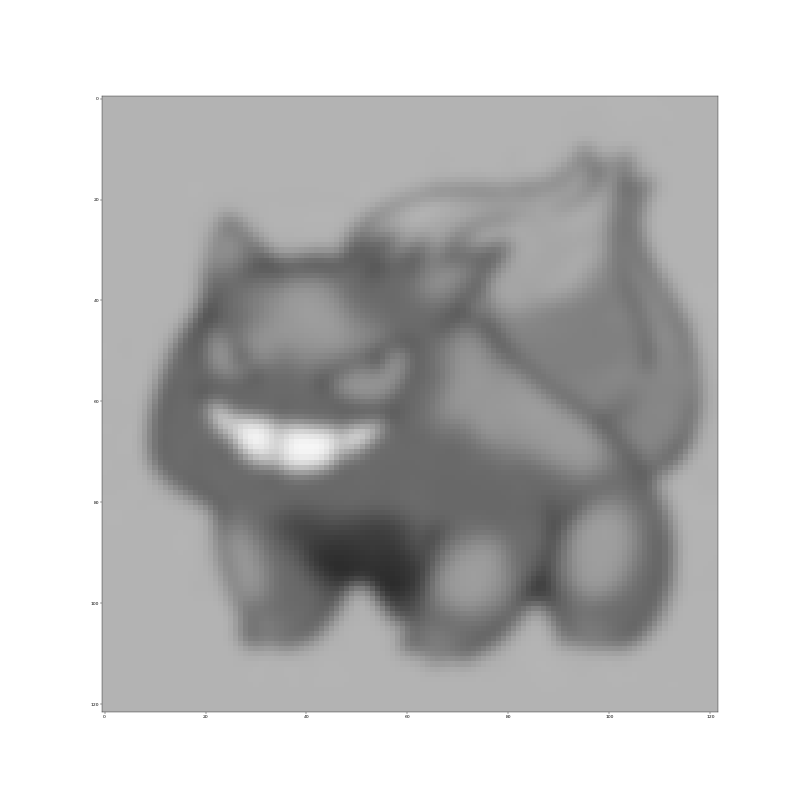

(122, 122, 3)


<IPython.core.display.Javascript object>


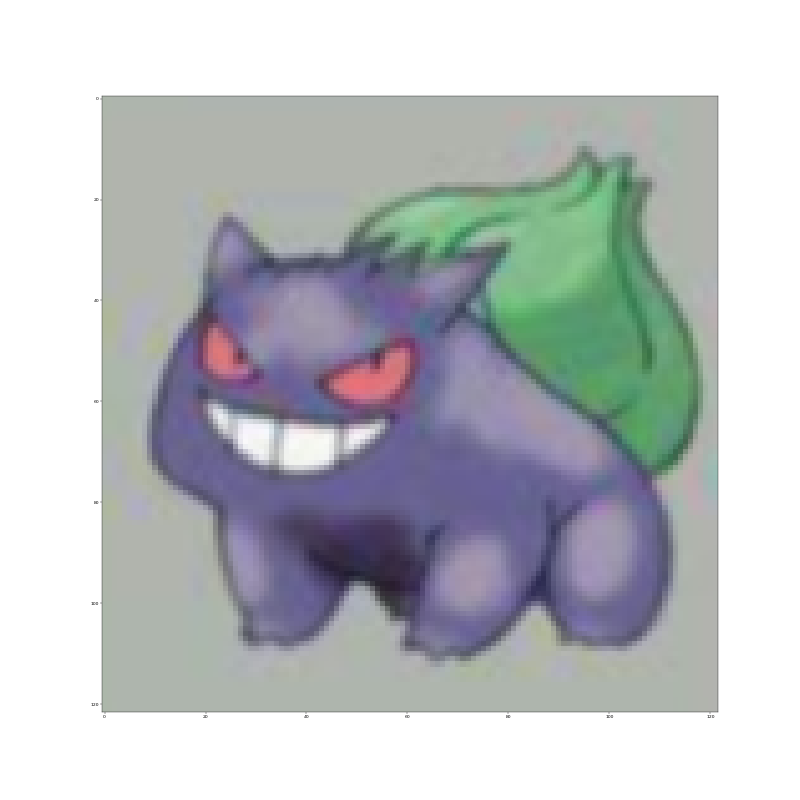

In [5]:
gaussian_3 = cv2.GaussianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (3,3), 0)
gaussian_11 = cv2.GaussianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (9,9), 0)
show(gaussian_3)
show(gaussian_11)

show(cv2.GaussianBlur(img, (3,3), 0))

(122, 122)


<IPython.core.display.Javascript object>


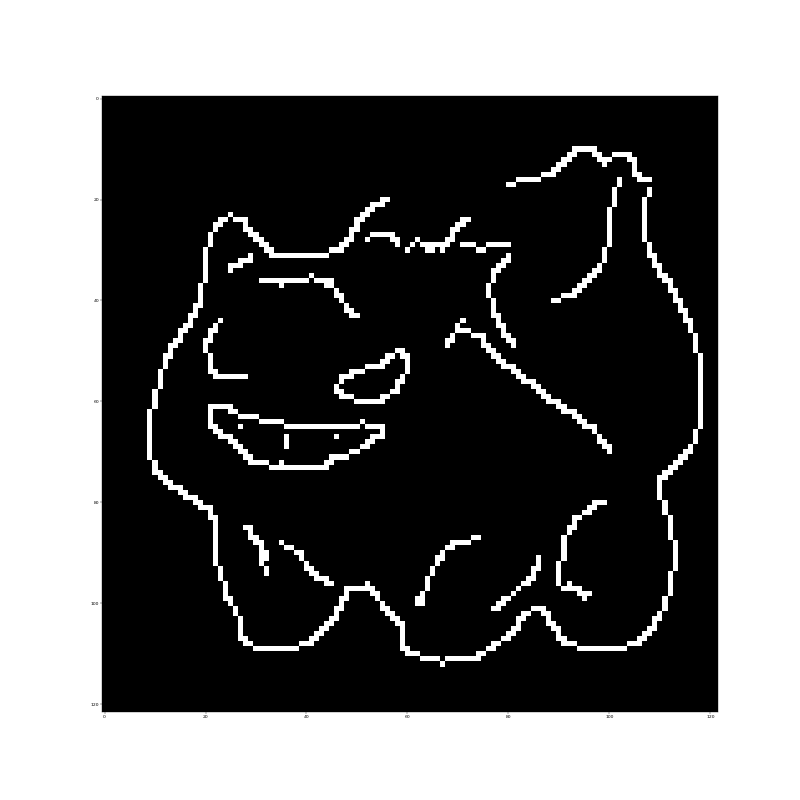

In [111]:
canny = cv2.Canny(gaussian_11, 70, 100)
show(canny, cmap=plt.cm.gray)

(122, 122, 3)


<IPython.core.display.Javascript object>


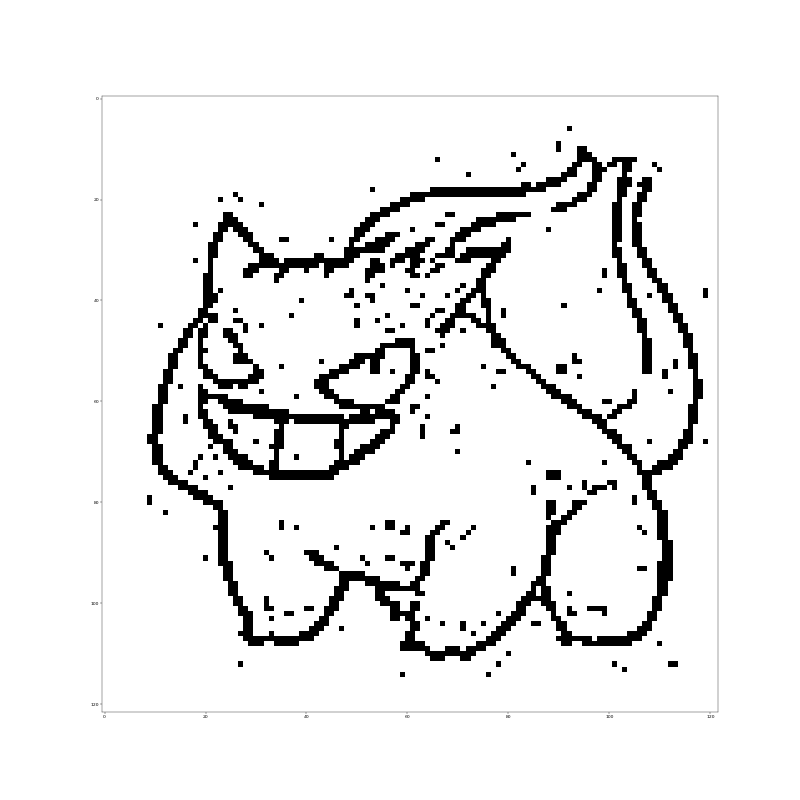

(122, 122, 3)


<IPython.core.display.Javascript object>


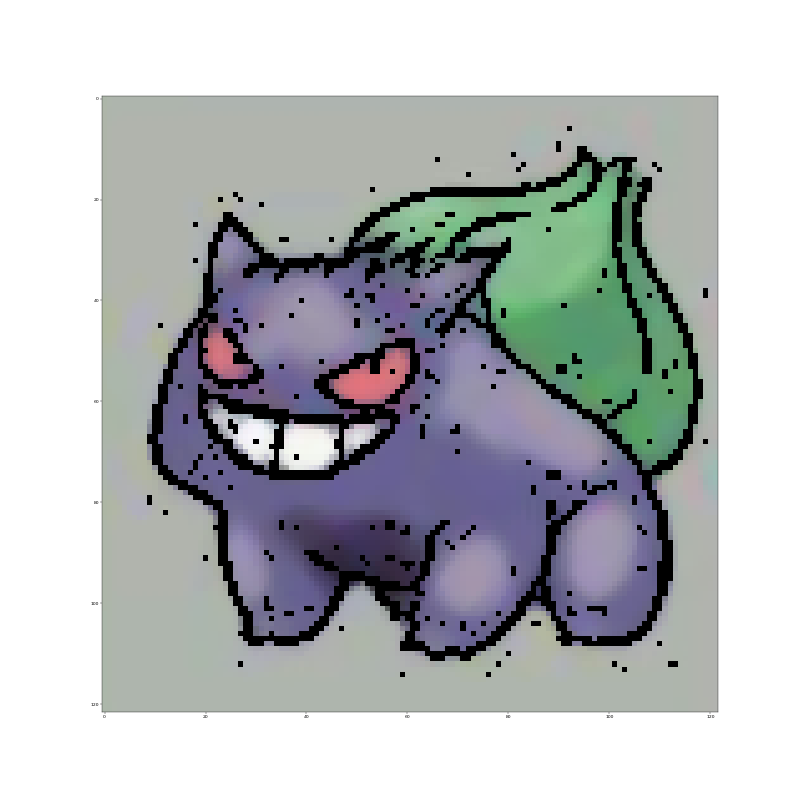

In [133]:
#_,canny = cv2.threshold(gaussian_3,100,255,cv2.THRESH_BINARY)
canny = cv2.adaptiveThreshold(gaussian_3, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,2)
cond = np.zeros(img.shape)
cond[:,:,0] = canny
cond[:,:,1] = canny
cond[:,:,2] = canny
#cond = 255-cond
#cond = cv2.GaussianBlur(cond, (3,3), 0)
show(cond.astype(np.uint8))
test = np.multiply(median, cond)/255
#test = np.where(cond==0, gaussian_3, 255-cond+60)
show(test.astype(np.uint8))